# Clustering


Let's say you have some data. The figure shown below is taken from delivery fleet driver dataset. It shows the mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit .

Just looking at the data, can you gain some knowledge?

![](images/img.png)

### Questions

Are these just some random points?
    
Is there any correlation between the data?

Can we do some kind of clustering to make it easier to say if a driver is good or bad?

# K-means Clustering

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

## Steps
There are 4 steps involved in this algorithm:

    Step 1 - Pick K random points as cluster centers called centroids.
    Step 2 - Assign each point to nearest cluster by calculating its distance to each centroid.
    Step 3 - Find new cluster center by taking the average of the assigned points.
    Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

The end result is that the sum of squared errors is minimised between points and their respective centroids.

### Question? 

But how to calculate the **distance**?

![](images/animation.gif)

The above animation is an example of running K-Means Clustering on a two dimensional data.

## Step 1

We randomly pick K cluster centers(centroids). Let’s assume these are $c_{1}, c_{2}, …, c_{k}$, and we can say that                             <center>  $ C = c_{1}, c_{2}, …, c_{k} $ </center>
                             

C is the set of all centroids.


## Step 2

In this step we assign each input value to closest center. This is done by calculating Euclidean(L2) distance between the point and the each centroid.
<center> $argmin$ $dist(c_{i},x)^{2}$ </center>

Where dist(.) is the Euclidean distance.


## Step 3

In this step, we find the new centroid by taking the average of all the points assigned to that cluster.

<center> $c_{i}$ = $\frac{1}{|S_{i}|} \sum_{x_{i} ∈ S_{i}} x_{i} $ </center>

$S_{i}$ is the set of all points assigned to the $i^{th}$ cluster.

## Step 4

In this step, we repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

# Choosing the Value of K 

We often know the value of K. In that case we use the value of K. Else we use the **Elbow Method.**

![](images/k.jpg) 

We run the algorithm for different values of K(say K = 1 to 10) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure. 


### Example
For now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings; warnings.simplefilter('ignore')
from skimage import io, color
from sklearn.cluster import KMeans
import math
from copy import deepcopy

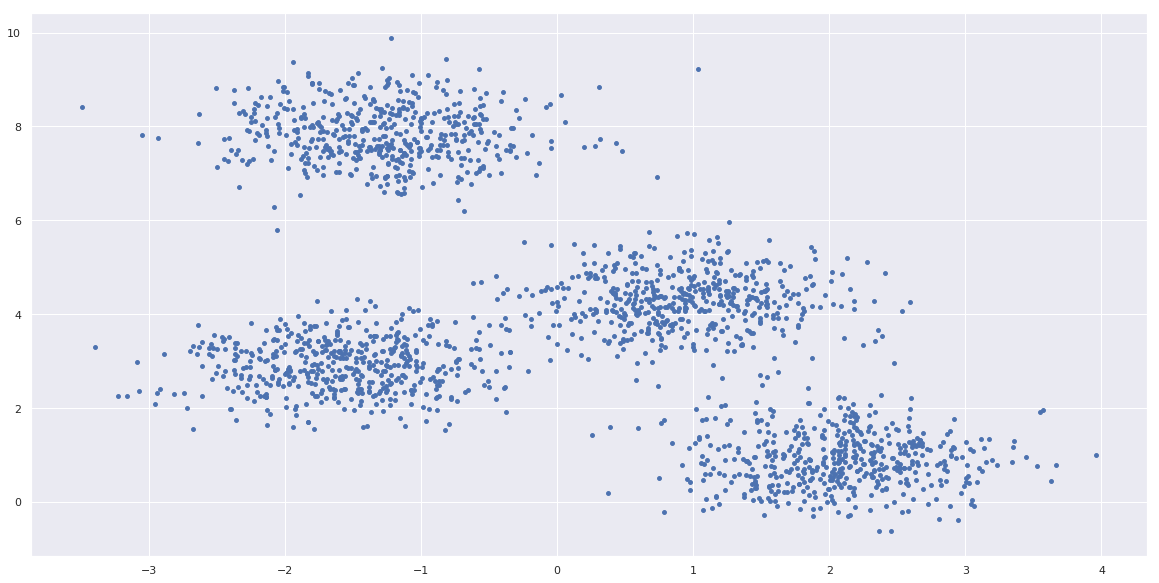

In [20]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=2000, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(20,10)) 
plt.scatter(X[:, 0], X[:, 1], s = 15);


In [21]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [22]:
k = 4
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X[:,0]), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X[:,1]), size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print(C)

[[1. 0.]
 [2. 1.]
 [2. 3.]
 [1. 8.]]


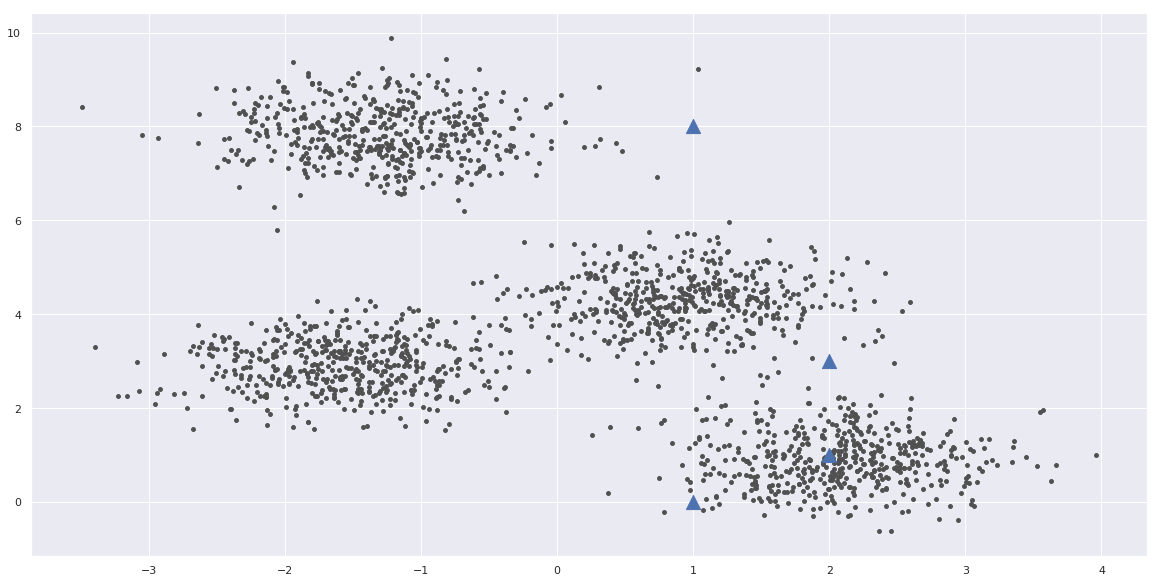

In [23]:
plt.figure(figsize=(20,10)) 
plt.scatter(X[:, 0], X[:, 1], c='#505050', s = 15);
plt.scatter(C_x, C_y, marker='^', s=200, c='b')

In [24]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2, 3)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

Center shift for this iteration 3.881284


Text(0.5,1,'New clustering')

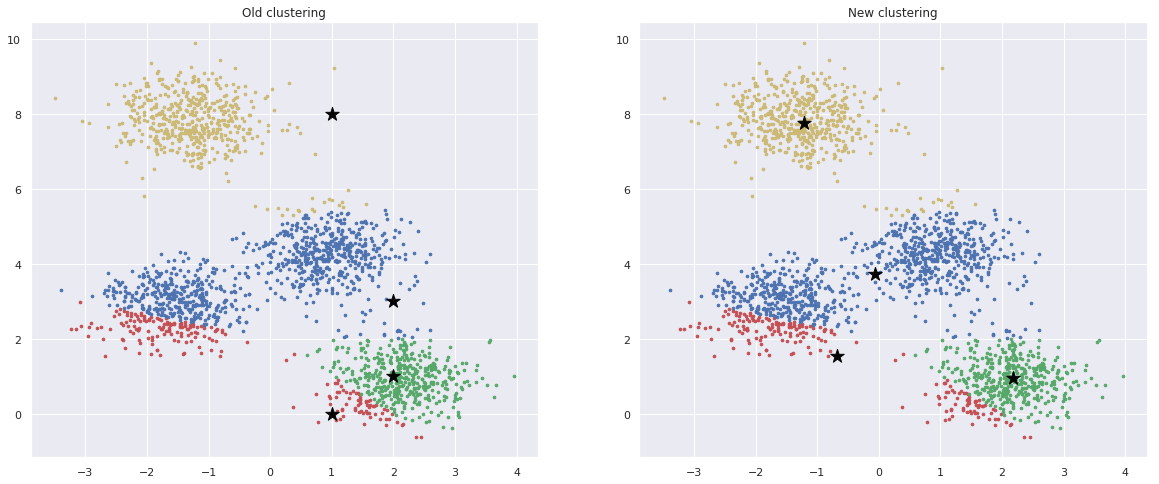

In [25]:
# Loop will run till the error becomes zero
# while error != 0:
# Assigning each value to its closest cluster

for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
plt.figure(figsize=(20,8)) 
plt.subplot(121)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.title('Old clustering')

# Storing the old centroid values
C_old = deepcopy(C)
# Finding the new centroids by taking the average value
for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
error = dist(C, C_old, None)
print('Center shift for this iteration', error)

plt.subplot(122)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.title('New clustering')

## K-Means for Color Compression

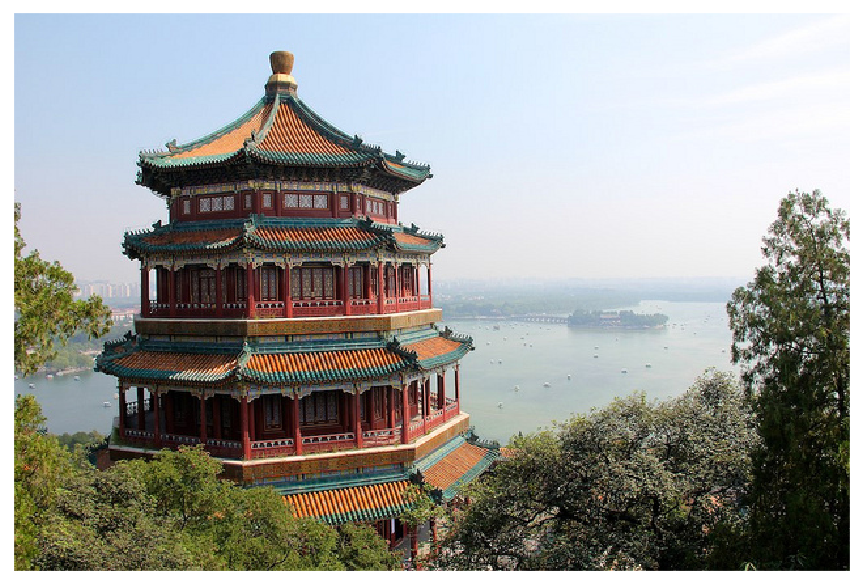

In [26]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.figure(figsize=(15,15)) 
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [27]:
china.shape

(427, 640, 3)

In [28]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

In [29]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

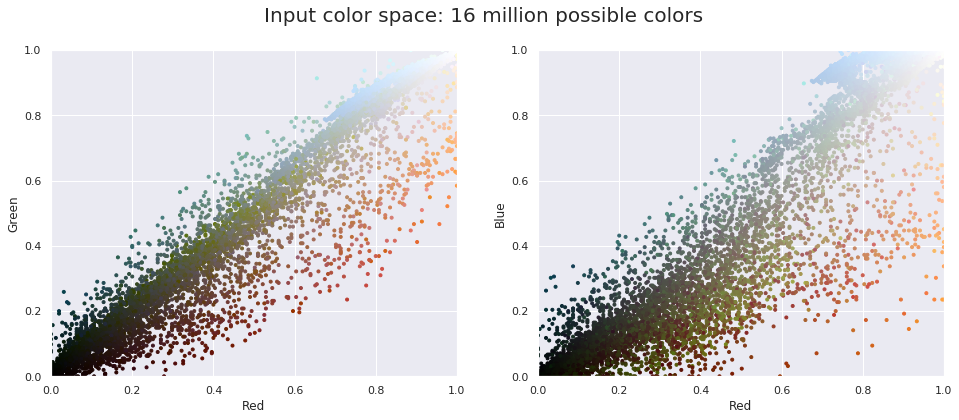

In [30]:
plot_pixels(data, title='Input color space: 16 million possible colors')
plt.axis = 'off'

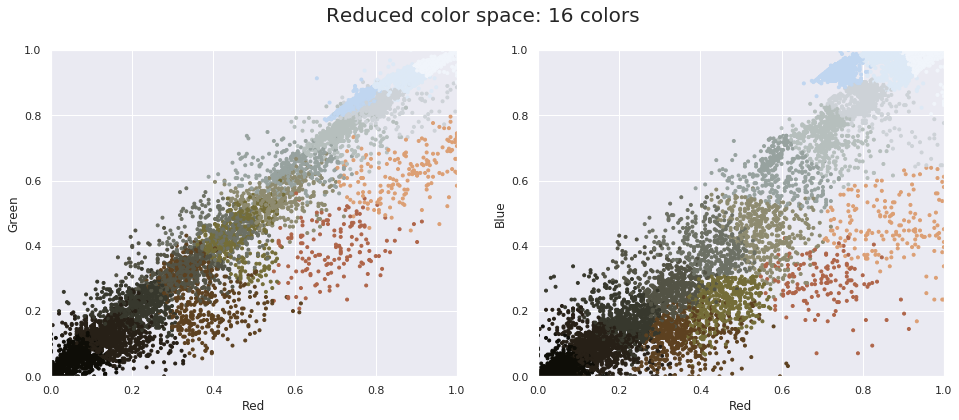

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

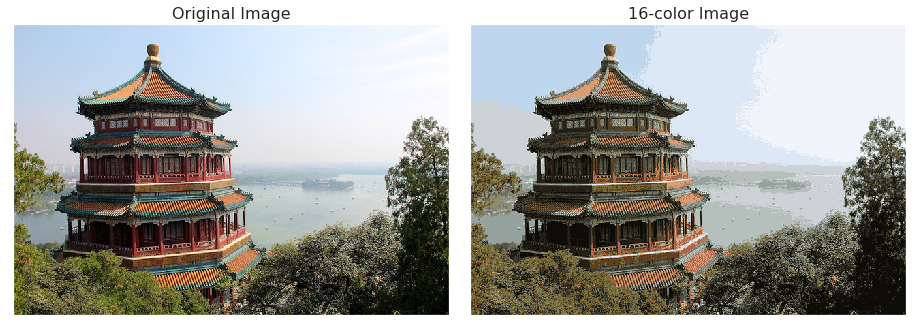

In [32]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [33]:
len(np.unique(china_recolored[:,:,0]))

16

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around 1 million! While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.

## Image segmentation

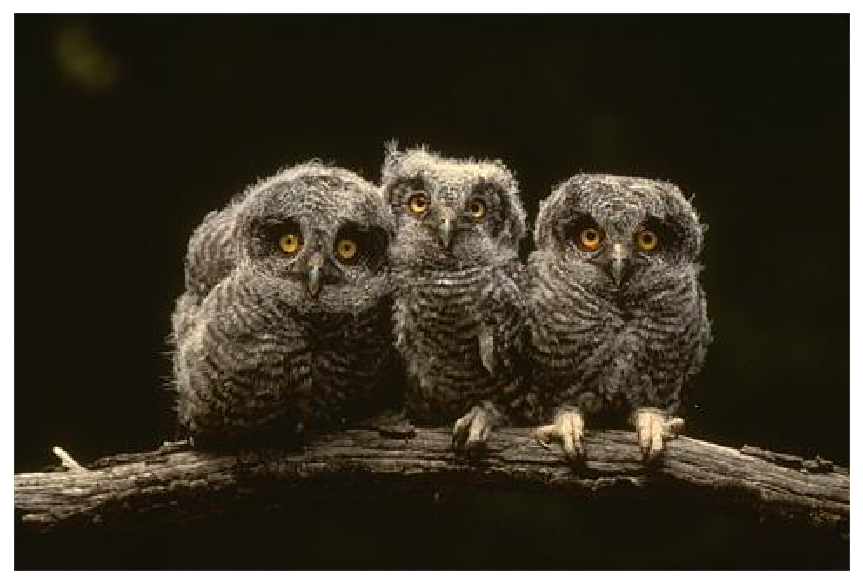

In [34]:
owls = io.imread('images/input.jpg') / 255.0
plt.figure(figsize=(15,15)) 
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(owls);

## What will you do if you want to separate owls from then background in this image?

## What are the features to be considered? 

## What should be the distance metric? 

In [35]:
print(owls.shape)
data = owls.reshape(-1, 3)
print(data.shape)

(321, 481, 3)
(154401, 3)


In [36]:
k = 2
kmeans = KMeans(k, max_iter=10, random_state=0)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

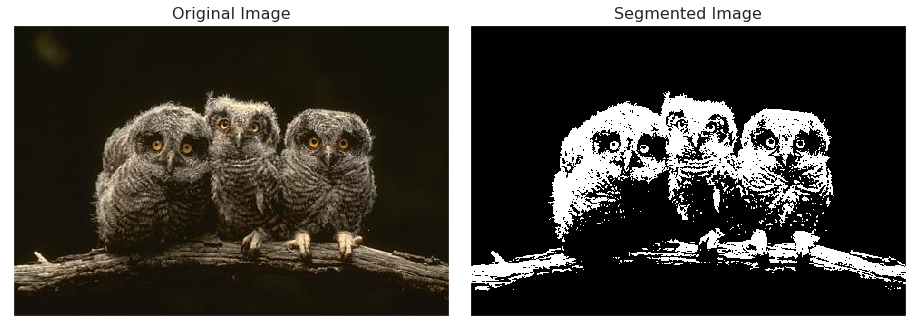

In [37]:
owls_recolored = new_colors.reshape(owls.shape)
owls_gray = color.rgb2gray(owls_recolored)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(owls)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(owls_gray, cmap = 'gray')
ax[1].set_title('Segmented Image', size=16);

# Break time!! 

# Another application: Super-pixel segmentation

## What is a superpixel?

A superpixel can be defined as a group of pixels which have similar characteristics. It is generally color based segmentation.

![](images/input2.png)

<img src="images/ssout.png" width="650">

In [38]:
from skimage.transform import rescale
fish = io.imread('images/input2.png')
ss = io.imread('images/ssout.png')
fish = rescale(fish, 0.5)

In [39]:
k = 400

data = fish.reshape(-1, 3)
kmeans = KMeans(k, max_iter=5, random_state=0)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

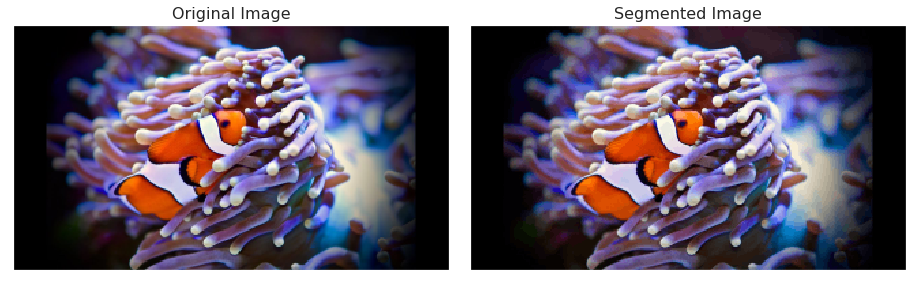

In [40]:
fish_recolored = new_colors.reshape(fish.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fish)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fish_recolored, cmap = 'gray')
ax[1].set_title('Segmented Image', size=16);

In [41]:
print(len(np.unique(fish_recolored[:,:,0])))

400


In [42]:
k = 400
h, w = fish.shape[0:2]
data = np.zeros([h * w, 5])
for i in range(h):
    for j in range(w):
        data[i * h + j, 0] = i
        data[i * h + j, 0] = j
        data[i * h + j, 0] = fish[i,j,0]
        data[i * h + j, 0] = fish[i,j,1]
        data[i * h + j, 0] = fish[i,j,2]
        
kmeans = KMeans(k, max_iter=10, random_state=0)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

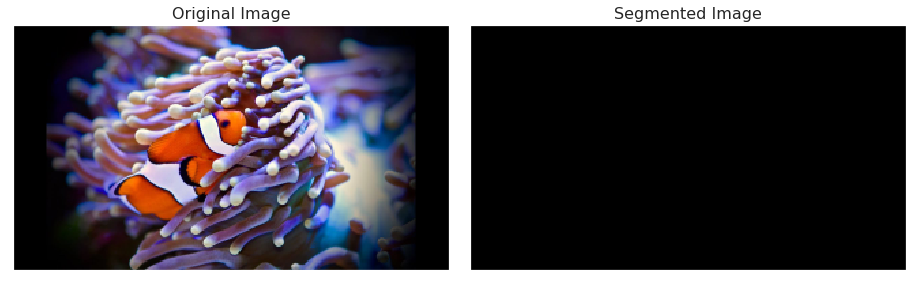

In [43]:
new = new_colors[:,2:5]
new = new.reshape(fish.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fish)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new, cmap = 'gray')
ax[1].set_title('Segmented Image', size=16);

In [44]:
kmeans.cluster_centers_[0]

array([0.00784314, 0.        , 0.        , 0.        , 0.        ])

### Two things are very important in K-Means (in fact in most of optimisation methods)
    Features
    Distance measure

Here, we take 5D feature --  CIELAB space (LAB channels) and Position (x,y)

For distance, we need to take normalized distance

<center> $S = \sqrt(\frac{N}{K})$ </center>
    
<img src="images/dist.png" width="300">

In [45]:
#from tqdm import trange
class Cluster(object):
    cluster_index = 1
    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []
        self.no = self.cluster_index
        Cluster.cluster_index += 1

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

    def __str__(self):
        return "{},{}:{} {} {} ".format(self.h, self.w, self.l, self.a, self.b)

    def __repr__(self):
        return self.__str__()


class SLICProcessor(object):
    def make_cluster(self, h, w):
        h = int(h)
        w = int(w)
        # print('h', h)
        # print('w', w)
        return Cluster(h, w,
                       self.data[h][w][0],
                       self.data[h][w][1],
                       self.data[h][w][2])

    def __init__(self, data, K, M = 20):
        self.K = K
        self.M = M
        self.data = data
        self.image_height = self.data.shape[0]
        self.image_width = self.data.shape[1]
        self.N = self.image_height * self.image_width
        self.S = int(math.sqrt(self.N / self.K))

        self.clusters = []
        self.label = {}
        self.dis = np.full((self.image_height, self.image_width), np.inf)

    def init_clusters(self):
        h = self.S / 2
        w = self.S / 2
        while h < self.image_height:
            while w < self.image_width:
                self.clusters.append(self.make_cluster(h, w))
                w += self.S
            w = self.S / 2
            h += self.S

    def get_gradient(self, h, w):
        if w + 1 >= self.image_width:
            w = self.image_width - 2
        if h + 1 >= self.image_height:
            h = self.image_height - 2

        gradient = self.data[h + 1][w + 1][0] - self.data[h][w][0] + \
                   self.data[h + 1][w + 1][1] - self.data[h][w][1] + \
                   self.data[h + 1][w + 1][2] - self.data[h][w][2]
        return gradient

    def move_clusters(self):
        for cluster in self.clusters:
            cluster_gradient = self.get_gradient(cluster.h, cluster.w)
            for dh in range(-1, 2):
                for dw in range(-1, 2):
                    _h = cluster.h + dh
                    _w = cluster.w + dw
                    new_gradient = self.get_gradient(_h, _w)
                    if new_gradient < cluster_gradient:
                        cluster.update(_h, _w, self.data[_h][_w][0], self.data[_h][_w][1], self.data[_h][_w][2])
                        cluster_gradient = new_gradient

    def assignment(self):
        for cluster in self.clusters:
            for h in range(cluster.h - 2 * self.S, cluster.h + 2 * self.S):
                if h < 0 or h >= self.image_height: continue
                for w in range(cluster.w - 2 * self.S, cluster.w + 2 * self.S):
                    if w < 0 or w >= self.image_width: continue
                    L, A, B = self.data[h][w]
                    Dc = math.sqrt(
                        math.pow(L - cluster.l, 2) +
                        math.pow(A - cluster.a, 2) +
                        math.pow(B - cluster.b, 2))
                    Ds = math.sqrt(
                        math.pow(h - cluster.h, 2) +
                        math.pow(w - cluster.w, 2))
                    D = math.sqrt(math.pow(Dc / self.M, 2) + math.pow(Ds / self.S, 2))
                    if D < self.dis[h][w]:
                        if (h, w) not in self.label:
                            self.label[(h, w)] = cluster
                            cluster.pixels.append((h, w))
                        else:
                            self.label[(h, w)].pixels.remove((h, w))
                            self.label[(h, w)] = cluster
                            cluster.pixels.append((h, w))
                        self.dis[h][w] = D

    def update_cluster(self):
        for cluster in self.clusters:
            sum_h = sum_w = number = 0
            for p in cluster.pixels:
                sum_h += p[0]
                sum_w += p[1]
                number += 1
                _h = int(sum_h / number)
                _w = int(sum_w / number)
                cluster.update(_h, _w, self.data[_h][_w][0], self.data[_h][_w][1], self.data[_h][_w][2])

    def get_output(self):
        image_arr = np.copy(self.data)
        for cluster in self.clusters:
            for p in cluster.pixels:
                image_arr[p[0]][p[1]][0] = cluster.l
                image_arr[p[0]][p[1]][1] = cluster.a
                image_arr[p[0]][p[1]][2] = cluster.b
            image_arr[cluster.h][cluster.w][0] = 0
            image_arr[cluster.h][cluster.w][1] = 0
            image_arr[cluster.h][cluster.w][2] = 0
        return image_arr    


In [46]:
K = 400
p = SLICProcessor(color.rgb2lab(fish), K, 20)

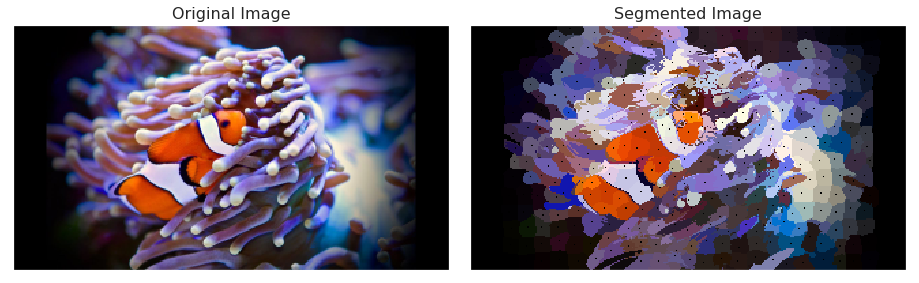

In [47]:
p.init_clusters()
p.move_clusters()
for i in range(5):
    p.assignment()
    p.update_cluster()
    name = 'output_K{k}_loop{loop}.png'.format(loop=i, k=K)
    lab_arr = p.get_output()
    rgb_arr = color.lab2rgb(lab_arr)
    io.imsave(name, rgb_arr)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fish)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(rgb_arr, cmap = 'gray')
ax[1].set_title('Segmented Image', size=16);

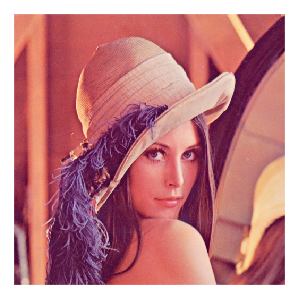

In [48]:
import skimage.io as skio
lenna=skio.imread('images/Lenna.png')
plt.figure(figsize=(5,5))
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(lenna)

(262144, 3)


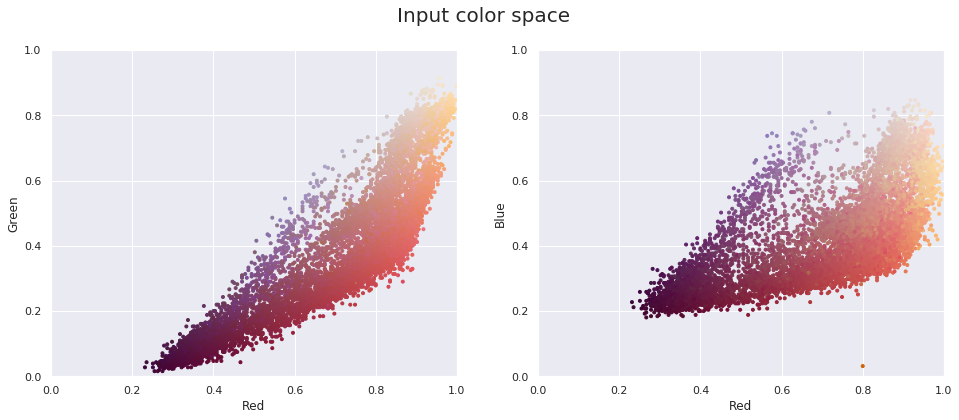

In [49]:
data=(lenna/255.0).reshape(-1,3)
print(data.shape)
plot_pixels(data,title='Input color space')
plt.axis='off'

In [50]:
def cluster_init(coords,n) : 
    return coords[np.random.randint(coords.shape[0],size=n)]
def get_distances(centroid, points):
    return np.linalg.norm(points - centroid, axis=1)

X=data
k=8
max_iter=30
centroids=cluster_init(X, k)
classes=np.zeros(X.shape[0], dtype=np.float64)
distances=np.zeros([X.shape[0], k], dtype=np.float64)
for i in range(max_iter):
    for i,c in enumerate(centroids):
        distances[:,i]=get_distances(c,X)
    classes=np.argmin(distances,axis=1)
    for c in range(k):
        centroids[c]=np.mean(X[classes==c],0)

In [52]:
new_image = np.zeros((262144,3))
for i in range(new_image.shape[0]):
    new_image[i,:] = centroids[classes[i]]*255
    
new_image=np.rint(new_image)

new_image = np.reshape(new_image,(512,512,3))


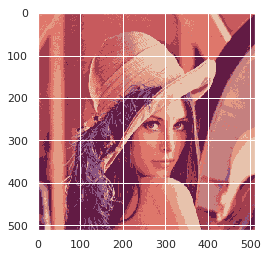

In [54]:
plt.imshow(new_image/255.0)

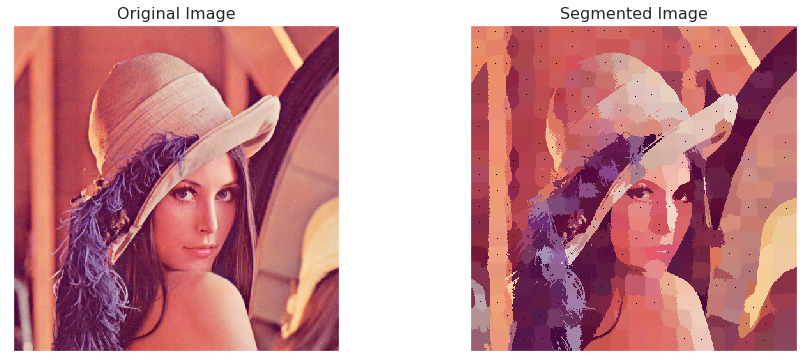

In [55]:
K = 400
p = SLICProcessor(color.rgb2lab(lenna), K, 20)
p.init_clusters()
p.move_clusters()

for i in range(5):
    p.assignment()
    p.update_cluster()
    name = 'output_K{k}_loop{loop}.png'.format(loop=i, k=K)
    lab_arr = p.get_output()
    rgb_arr = color.lab2rgb(lab_arr)
    io.imsave(name, rgb_arr)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(lenna)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(rgb_arr, cmap = 'gray')
ax[1].set_title('Segmented Image', size=16);